In [1]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import TensorBoard

In [2]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [5]:
from google.colab import files
uploaded = files.upload()

Saving flatland_train.data to flatland_train.data


In [3]:
cwd = os.getcwd()
print(cwd)
os.listdir(os.getcwd())

/content


['.config', 'flatland_train.data', 'sample_data']

In [4]:
import gzip
import pickle

X,y = pickle.load(gzip.open('/content/flatland_train.data','rb'))
y[y != 0] -= 2
X = X / 255.


In [ ]:
#flatland = pd.read_csv('flatland_train.data',encoding = "ISO-8859-1",index_col=None, header=0, engine='python')

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[50, 50]))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(32, activation="sigmoid"))
model.add(keras.layers.Dense(64, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 2500)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               320128    
_________________________________________________________________
dense_19 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_20 (Dense)             (None, 64)                2112      
Total params: 326,368
Trainable params: 326,368
Non-trainable params: 0
_________________________________________________________________


In [ ]:
'''
welp someday....

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=[32,50,50]))
model.add(Flatten())
model.add(keras.layers.Dense(10, activation="sigmoid"))

model.add(keras.layers.Dense(10, activation="softmax"))
model.add(Flatten())
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])
model.summary()
'''

In [22]:
loss = model.fit(X, y, epochs=10, validation_split=0.35)

Epoch 1/10
204/204 [==============================] - 1s 3ms/step - loss: 0.2921 - accuracy: 0.8854 - val_loss: 0.4956 - val_accuracy: 0.7934
Epoch 2/10
204/204 [==============================] - 1s 3ms/step - loss: 0.2727 - accuracy: 0.8948 - val_loss: 0.4668 - val_accuracy: 0.8060
Epoch 3/10
204/204 [==============================] - 1s 3ms/step - loss: 0.2443 - accuracy: 0.9074 - val_loss: 0.4701 - val_accuracy: 0.8049
Epoch 4/10
204/204 [==============================] - 1s 3ms/step - loss: 0.2368 - accuracy: 0.9106 - val_loss: 0.4700 - val_accuracy: 0.8040
Epoch 5/10
204/204 [==============================] - 1s 3ms/step - loss: 0.2296 - accuracy: 0.9158 - val_loss: 0.4742 - val_accuracy: 0.8046
Epoch 6/10
204/204 [==============================] - 1s 3ms/step - loss: 0.2293 - accuracy: 0.9137 - val_loss: 0.4892 - val_accuracy: 0.8120
Epoch 7/10
204/204 [==============================] - 1s 3ms/step - loss: 0.2062 - accuracy: 0.9268 - val_loss: 0.4812 - val_accuracy: 0.8043
Epoch 

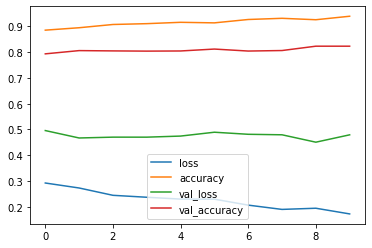

In [23]:
#pd.DataFrame(loss.history).plot()

In [24]:
model.save('model.h5')

In [27]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
import gzip
import pickle

def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255.
    acc = np.mean(model(X).numpy().argmax(axis=1) == y)
    return acc

model = keras.models.load_model('model.h5')
evaluate('flatland_train.data', model)

0.9066